<a href="https://colab.research.google.com/github/Tony-Jaime02/Banana_Convolution-Neural-Network/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

import tensorflow as tfa
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [6]:
%cd "/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset"

base_dir = 'Fruits'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 15,
							zoom_range = 0.3,
							horizontal_flip = True,
							brightness_range=[0.7,0.9],
							vertical_flip=True,
							)
							
val_datagen = ImageDataGenerator(1./255)


train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (250, 250),
							batch_size = 6,
							class_mode ='categorical')


val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (250, 250),
							batch_size = 6, #Cada cuantos ejemplos se actualiza la epoca
							#step_per_epoch Cada cuantos batches son una epoca
							class_mode= 'categorical')

conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (250,250,3))

/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset
Found 264 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))


conv_base.trainable = False

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(lr=2e-5),
						metrics=['acc'])

history = model.fit(train_generator, 
				steps_per_epoch = 10,
				epochs = 10, 
				validation_data = val_generator, 
				validation_steps = 10)
				


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 120)               3010680   
                                                                 
 dense_1 (Dense)             (None, 3)                 363       
                                                                 
Total params: 17,725,731
Trainable params: 3,011,043
Non-trainable params: 14,714,688
_________________________________________________________________


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 7.8392 - acc: 0.3333

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


10/10 [==============================] - 104s 11s/step - loss: 7.8392 - acc: 0.3333 - val_loss: 26.0645 - val_acc: 0.5000
Epoch 2/10
10/10 [==============================] - 110s 11s/step - loss: 2.4372 - acc: 0.4333 - val_loss: 21.0859 - val_acc: 0.5333
Epoch 3/10
10/10 [==============================] - 103s 11s/step - loss: 1.5393 - acc: 0.5167 - val_loss: 18.8312 - val_acc: 0.5500
Epoch 4/10
10/10 [==============================] - 100s 11s/step - loss: 1.2962 - acc: 0.6000 - val_loss: 16.1718 - val_acc: 0.6333
Epoch 5/10
10/10 [==============================] - 135s 14s/step - loss: 1.7352 - acc: 0.4833 - val_loss: 17.9290 - val_acc: 0.6500
Epoch 6/10
10/10 [==============================] - 137s 15s/step - loss: 1.6794 - acc: 0.5833 - val_loss: 22.9896 - val_acc: 0.6167
Epoch 7/10
10/10 [==============================] - 135s 14s/step - loss: 1.6035 - acc: 0.5500 - val_loss: 27.5753 - val_acc: 0.5833
Epoch 8/10
10/10 [==============================] - 134s 14s/step - loss: 1.1699

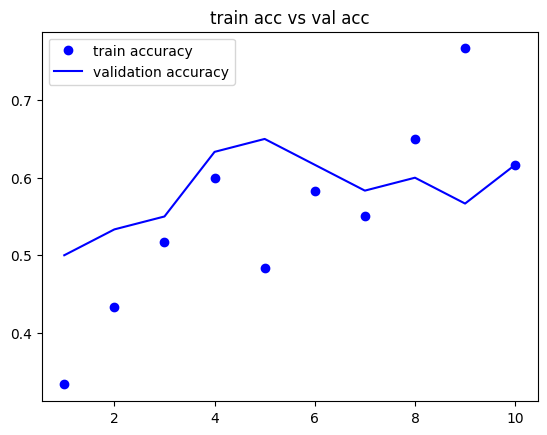

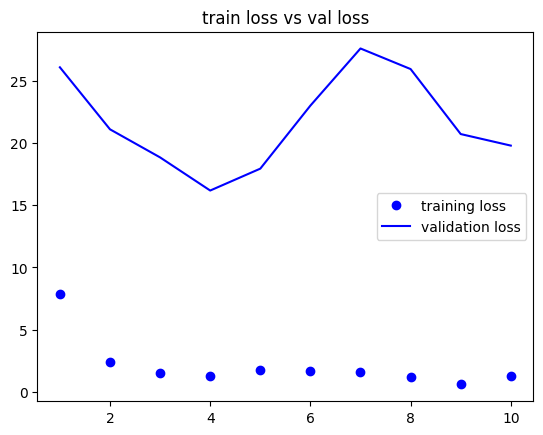

Found 75 images belonging to 3 classes.


<ipython-input-8-5e2fad3251e8>:31: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps = 1)



test acc :
 0.6666666865348816


In [8]:
model.save('bananas.h5')
			
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (250, 250),
					batch_size = 75,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 1)
print('\ntest acc :\n', test_acc)

#Matriz de confusión

3/3 [==============================] - 68s 21s/step
[[24  0  2]
 [10 17  0]
 [12  1  9]]


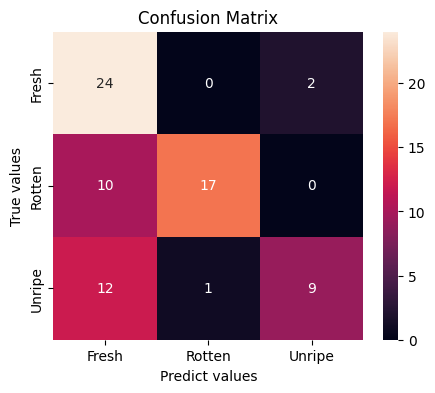

In [9]:
y_test = test_generator[0][0]
y = test_generator[0][1]
y_label = np.argmax(y, axis=1)

#print(y_label)

y_pred = model.predict(y_test)
y_pred_label = np.argmax(y_pred, axis=1)

#print(y_pred)
#print(y_pred_label)

cm = confusion_matrix(y_label, y_pred_label, labels=[0,1,2])
print(cm)

cm_df = pd.DataFrame(cm, index = ['Fresh', 'Rotten', 'Unripe'], columns = ['Fresh', 'Rotten', 'Unripe'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True values')
plt.xlabel('Predict values')
plt.show()

#Reflexión

Actualmente mi neurona se encuentra en el estado de underfiting por el nivel de certeza que obtuvo al momento de entrenar a la neurona. Esto puede ser causado por que la neurona no estuvo configurada de la mejor manera o debido a los datos de mi dataset, ya que son muy dispersos. 
